# DS 5030 Project 1

### Names: Erin Siedlecki, Shaveen Saadee, Anna Li, Emily Garman, Razan Habboub, Marissa Burton


## Question 1

In [3]:
# Describe the data clearly -- particularly any missing data that might impact your analysis -- 
# and the provenance (the place of origin or earliest known history of something) of your dataset. 
# Who collected the data and why?

[NEED TO ADD INFO ABOUT DATA IN GENERAL AND MISSING DATA ONE ANNA LOADS IT]

The data we are using in this analysis is the Chordonomicon dataset which consists of data from 666,000 songs and their corresponding chord progressions. The dataset also contains additional information such as release date, decade, genre, and Spotify song and artist IDs. In our particular analysis, we are limiting our search to music by Taylor Swift, but the original dataset contains information from thousands of artists. The Chordonomicon dataset was collected by Spyridon Kantarelis, Konstantinos Thomas, Vassilis Lyberatos, Edmund Dervakos, and Giorgos Stamou from the Artificial Intelligence and Learning Systems Laboratory at the National Technical University of Athens, Greece. These researchers used web scraping to retrieve chord information from the Ultimate Guitar platform. They performed data engineering with the help of music experts to appropriately refine the chords. They also used the Spotify Web API to pull additional data regarding release date, genre, song ID, and artist ID.

The researchers describe the importance of chord progressions as the "backbone of musical composition", and they saught to generate a large-scale dataset that can be used for advanced machine learning. They collected this data because they noted that chord progression, while vital to music composition, is a very underexplored area of research. There are limited datasets currently in existence as collectors are restricted by copyright laws, lack of audio availability, distribution, and bias. The datasets that do exist at this time are not large enough for the work that this team is interested in. Their solution, the Chordonomicon dataset, has more than twenty times the amout of chord progressions than the previous largest dataset. Now that the data has been collected by this team, the researchers performed experiments on chord prediction and decade and genre classification.

## Citation

@article{kantarelis2024chordonomicon, title={CHORDONOMICON: A Dataset of 666,000 Songs and their Chord Progressions}, author={Kantarelis, Spyridon and Thomas, Konstantinos and Lyberatos, Vassilis and Dervakos, Edmund and Stamou, Giorgos}, journal={arXiv preprint arXiv:2410.22046}, year={2024} }

# Question 4

In [1]:
import pandas as pd
import numpy as np
import pickle, music21, re
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# import data
swift = pd.read_csv('./swift_mapped.csv')
swift.head(20)

,id,time,chord,root,1,2,3,4,5,6,7,8,9,10,11,12
0,10795,1,C,C,1,0,0,0,1,0,0,1,0,0,0,0
1,10795,2,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
2,10795,3,F,F,1,0,0,0,0,1,0,0,0,1,0,0
3,10795,4,C,C,1,0,0,0,1,0,0,1,0,0,0,0
4,10795,5,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
5,10795,6,F,F,1,0,0,0,0,1,0,0,0,1,0,0
6,10795,7,C,C,1,0,0,0,1,0,0,1,0,0,0,0
7,10795,8,Amin,A,1,0,0,0,1,0,0,0,0,1,0,0
8,10795,9,F,F,1,0,0,0,0,1,0,0,0,1,0,0
9,10795,10,G,G,0,0,1,0,0,0,0,1,0,0,0,1


In [3]:
seq = []
songs = swift['id'].unique()
for song in songs: # Cleans up the chord symbols for music21
    df_s = swift.loc[ swift['id']==song, :]
    lt = list(df_s['chord'])
    lt = [ re.sub(r' ','', ch) for ch in lt]
    lt = [ re.sub(r'M','', ch) for ch in lt]
    lt = [ re.sub(r'(?<=[A-G])s(?!us)', '#', ch) for ch in lt]
    lt = [ re.sub(r'b','-', ch) for ch in lt]
    lt = [ re.sub(r'min','m', ch) for ch in lt]
    lt = [ re.sub(r'dim7','dim', ch) for ch in lt]
    lt = [ re.sub(r'no3d','', ch) for ch in lt]
    seq.append( lt )

swift = seq

In [4]:
# determine the state space
states = set()
for song in swift:
    states = states.union( set(song) )
states = list(states)

print('States:\n', np.array(states) )

States:
 ['Bsus4' 'Am' 'G7' 'A7' 'F#dim' 'G#' 'Cmaj7' 'Fsus2' 'Bm7' 'G#m' 'G' 'E-7'
 'Gadd13' 'Gsus4' 'Asus4' 'Dm7' 'Dmaj7' 'A7sus4' 'Cm7' 'D7' 'Dsus2' 'E-'
 'D-m' 'C#m' 'Em' 'B-sus4' 'Emadd13' 'E7sus4' 'A' 'Bm' 'Dm' 'Gadd11'
 'Gmaj7' 'F#7sus4' 'Asus2' 'Dsus4' 'Aadd13' 'D#' 'C#' 'A-' 'C7sus4' 'F#7'
 'Gm' 'E7' 'Csus2' 'F#m' 'Fmaj7' 'B-' 'D' 'Em7' 'Fm' 'C7' 'B7' 'E' 'G#dim'
 'Cm' 'B' 'C9' 'F#' 'Am7' 'D#m' 'C' 'Cadd9' 'F']


In [ ]:
# play state space - chords valid for music21
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  

In [8]:
# create a transition matrix, and find the transition counts:

S = len(states)
T = len(swift)
tr_counts = np.zeros( (S, S) )

# compute transition counts:
for song in swift:
    seq = np.array(song)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

#print('Transition Counts:\n', tr_counts)

# sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
#print('State proportions: \n',sums)

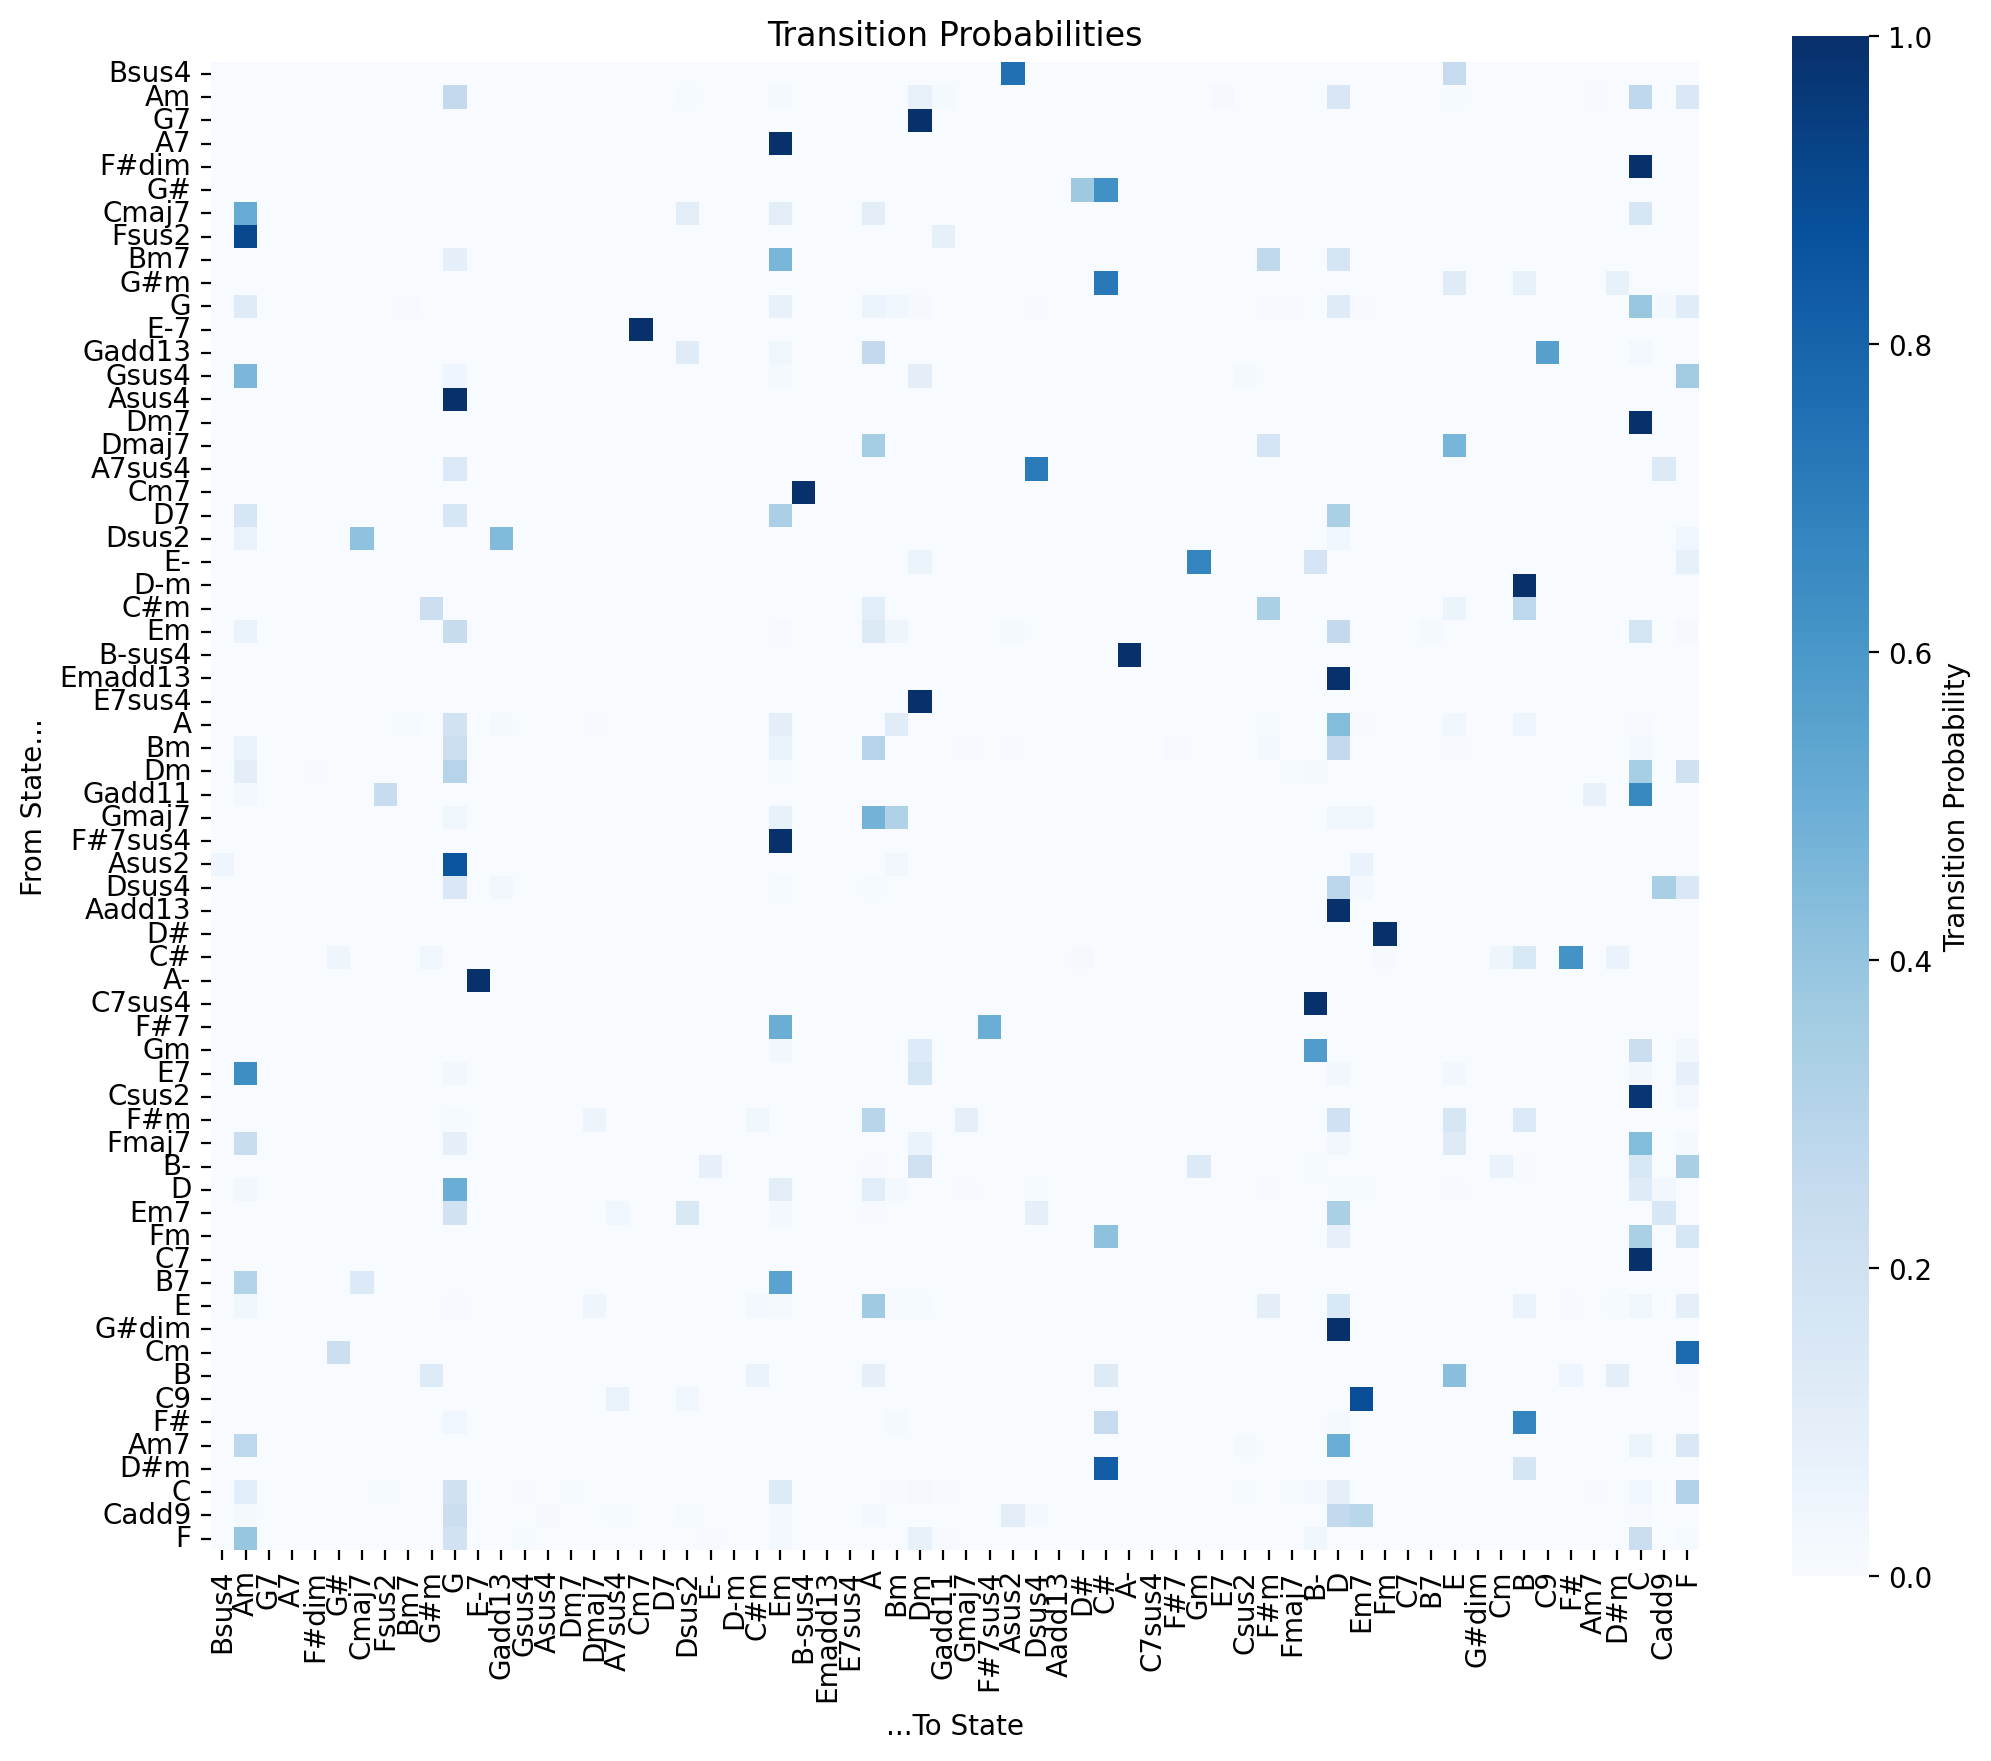

In [ ]:
# ----- probability of chord transitions -----

# normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

#print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
#print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()